In [139]:
# Importing important librarays
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sn
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import make_pipeline


In [ ]:
#Loading the data
Data = pd.read_csv("./data_processing/final_data/world.csv")
Data1 = pd.read_csv('./data_processing/final_data/Countrys.csv', encoding='latin-1')
Data2 = pd.read_csv('./data_processing/final_data/Regions.csv', encoding='latin-1')
Data3 = pd.read_csv('./data_processing/final_data/Mediam-country.csv',encoding='latin-1')

In [51]:
#Checking if their is
Data.isna().sum()

Year      0
Upper     0
Median    0
Lower     0
dtype: int64

In [52]:
Data1.isna().sum()

ISO.Code               0
Country.Name           0
Uncertainty.Bounds*    0
1990.5                 0
1991.5                 0
1992.5                 0
1993.5                 0
1994.5                 0
1995.5                 0
1996.5                 0
1997.5                 0
1998.5                 0
1999.5                 0
2000.5                 0
2001.5                 0
2002.5                 0
2003.5                 0
2004.5                 0
2005.5                 0
2006.5                 0
2007.5                 0
2008.5                 0
2009.5                 0
2010.5                 0
2011.5                 0
2012.5                 0
2013.5                 0
2014.5                 0
2015.5                 0
2016.5                 0
2017.5                 0
2018.5                 0
2019.5                 0
2020.5                 0
2021.5                 0
dtype: int64

In [130]:
Data2.isna().sum()

Region.Name            0
Uncertainty.Bounds*    0
1990.5                 0
1991.5                 0
1992.5                 0
1993.5                 0
1994.5                 0
1995.5                 0
1996.5                 0
1997.5                 0
1998.5                 0
1999.5                 0
2000.5                 0
2001.5                 0
2002.5                 0
2003.5                 0
2004.5                 0
2005.5                 0
2006.5                 0
2007.5                 0
2008.5                 0
2009.5                 0
2010.5                 0
2011.5                 0
2012.5                 0
2013.5                 0
2014.5                 0
2015.5                 0
2016.5                 0
2017.5                 0
2018.5                 0
2019.5                 0
2020.5                 0
2021.5                 0
dtype: int64

In [53]:
Data3.isna().sum()

ISO.Code               0
Country.Name           0
Uncertainty.Bounds*    0
1990.5                 0
1991.5                 0
1992.5                 0
1993.5                 0
1994.5                 0
1995.5                 0
1996.5                 0
1997.5                 0
1998.5                 0
1999.5                 0
2000.5                 0
2001.5                 0
2002.5                 0
2003.5                 0
2004.5                 0
2005.5                 0
2006.5                 0
2007.5                 0
2008.5                 0
2009.5                 0
2010.5                 0
2011.5                 0
2012.5                 0
2013.5                 0
2014.5                 0
2015.5                 0
2016.5                 0
2017.5                 0
2018.5                 0
2019.5                 0
2020.5                 0
2021.5                 0
dtype: int64

In [54]:
Data.head()

,Year,Upper,Median,Lower
0,1990.5,91.7144,93.0265,94.5270
1,1991.5,90.8735,92.0843,93.4727
2,1992.5,90.3102,91.4601,92.7870
3,1993.5,89.1827,90.3089,91.6037
4,1994.5,88.1390,89.2436,90.5175


In [55]:
Data1.head()

,ISO.Code,Country.Name,Uncertainty.Bounds*,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,AFG,Afghanistan,Lower,88440,86209,84486,89585,98115,104568,108816,...,83913,81903,78985,76421,73260,69532,66235,63044,60064,57191
1,AFG,Afghanistan,Median,96478,93896,91784,97116,106230,113041,117417,...,93295,92148,90252,88672,86617,84127,82306,80677,79117,77811
2,AFG,Afghanistan,Upper,105107,102017,99493,105049,114686,121795,126438,...,103247,102858,101956,101655,100917,99672,99727,100559,101643,103663
3,ALB,Albania,Lower,2956,2786,2626,2468,2334,2210,2065,...,381,358,337,318,302,289,279,271,264,257
4,ALB,Albania,Median,3322,3128,2939,2764,2613,2477,2310,...,395,371,350,331,314,301,291,284,281,279


In [56]:
Data2.head()

,Region.Name,Uncertainty.Bounds*,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,Landlocked developing countries,Lower,163.3713,161.2143,159.1952,157.7577,158.9254,151.7868,148.5652,145.5601,...,73.6854,70.2756,67.3123,64.6551,62.0669,59.8847,57.7294,55.6866,53.7230,51.9269
1,Landlocked developing countries,Median,167.0614,164.8220,162.7679,161.2435,162.3344,155.0526,151.7127,148.6099,...,76.0458,72.7483,69.8582,67.3011,64.8649,62.8573,60.8472,58.9498,57.2073,55.7039
2,Landlocked developing countries,Upper,171.3171,168.9795,166.8137,165.2119,166.2859,158.8606,155.4367,152.2397,...,78.9169,75.8096,73.1646,70.9245,68.8901,67.3241,65.7727,64.4323,63.3522,62.7155
3,Small island developing States,Lower,74.3699,72.7835,71.2819,69.6668,68.1071,66.2466,64.8556,62.8243,...,43.1730,42.0991,40.9823,39.7135,38.8206,37.6627,36.3739,35.1505,33.7899,32.5386
4,Small island developing States,Median,76.8461,75.1958,73.6773,72.0216,70.4050,68.5043,67.1235,65.0596,...,46.0231,45.1305,44.1586,43.1290,42.5455,41.7740,40.7229,39.8651,38.8759,37.8665


In [57]:
Data3.head()

,ISO.Code,Country.Name,1985.5,1986.5,1987.5,1988.5,1989.5,1990.5,1991.5,1992.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,AFG,Afghanistan,211.0975,204.5622,197.9429,191.3952,184.8613,178.4510,172.2279,166.3461,...,80.2697,76.7712,73.3774,70.1723,67.2483,64.5819,62.1718,59.9173,57.7978,55.6575
1,ALB,Albania,54.7511,51.0898,47.9032,45.1557,42.7981,40.8317,39.1433,37.6286,...,11.2140,10.4634,9.9216,9.5771,9.3997,9.3367,9.3439,9.3881,9.4361,9.4559
2,DZA,Algeria,74.6976,65.2901,59.0642,55.2652,53.0743,51.8901,51.2663,50.7505,...,26.4942,26.0503,25.6681,25.3046,24.9241,24.4831,23.9794,23.4515,22.8973,22.3353
3,AND,Andorra,17.4710,16.4658,15.5682,14.7067,13.8557,13.1167,12.3887,11.7152,...,4.1337,3.9225,3.7267,3.5254,3.3509,3.1954,3.0591,2.9504,2.8483,2.7564
4,AGO,Angola,226.6265,225.4729,224.7202,223.9889,223.7152,223.5046,223.4958,223.5959,...,104.8753,98.3058,92.9119,88.3390,84.4489,81.0795,77.9684,75.0384,72.0743,69.4213


In [6]:
# Include all rows from data,data1 and data2
subset_data = Data.copy()
subset_data1 = Data1.copy()
subset_data2 =Data2.copy()
subset_data3 =Data3.copy()

In [7]:
# Display the subset of data,data1 and data2
print(subset_data)
print(subset_data1)
print(subset_data2)
print(subset_data3)

      Year    Upper   Median    Lower
0   1990.5  91.7144  93.0265  94.5270
1   1991.5  90.8735  92.0843  93.4727
2   1992.5  90.3102  91.4601  92.7870
3   1993.5  89.1827  90.3089  91.6037
4   1994.5  88.1390  89.2436  90.5175
5   1995.5  86.1959  87.2732  88.5558
6   1996.5  84.4455  85.5041  86.7730
7   1997.5  82.5001  83.5399  84.7788
8   1998.5  80.3815  81.3939  82.6101
9   1999.5  78.0198  79.0101  80.2255
10  2020.5  75.3526  76.3367  77.5217
11  2001.5  72.7893  73.7579  74.9195
12  2002.5  70.2494  71.2101  72.3582
13  2003.5  67.5722  68.5216  69.6397
14  2004.5  65.0976  66.0270  67.1414
15  2005.5  62.2054  63.1198  64.2363
16  2006.5  59.6367  60.5399  61.6461
17  2007.5  57.0988  57.9892  59.1185
18  2008.5  54.8247  55.7247  56.8808
19  2009.5  52.3905  53.3111  54.4937
20  2010.5  50.4736  51.4230  52.6508
21  2011.5  48.5362  49.5331  50.8103
22  2012.5  46.5573  47.5866  48.9430
23  2013.5  44.9394  46.0193  47.5071
24  2014.5  43.3104  44.4400  46.1260
25  2015.5  

In [42]:
Data.describe()


,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,1999.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
count,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,...,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02
mean,6.425831e+04,6.282968e+04,6.109349e+04,5.973556e+04,5.864090e+04,5.706085e+04,5.564972e+04,5.416006e+04,5.264470e+04,5.106143e+04,...,3.357855e+04,3.261687e+04,3.162120e+04,3.068017e+04,2.984513e+04,2.900484e+04,2.822333e+04,2.747968e+04,2.675603e+04,2.614482e+04
std,2.796304e+05,2.717348e+05,2.629378e+05,2.556831e+05,2.488998e+05,2.423663e+05,2.354309e+05,2.281562e+05,2.207851e+05,2.134018e+05,...,1.254874e+05,1.204815e+05,1.152692e+05,1.107307e+05,1.072269e+05,1.037822e+05,1.005936e+05,9.771136e+04,9.495393e+04,9.298180e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.735000e+02,6.412500e+02,6.072500e+02,5.745000e+02,5.425000e+02,5.190000e+02,4.947500e+02,4.757500e+02,4.535000e+02,4.315000e+02,...,2.577500e+02,2.490000e+02,2.420000e+02,2.397500e+02,2.367500e+02,2.200000e+02,2.125000e+02,2.090000e+02,1.975000e+02,1.877500e+02
50%,5.344500e+03,5.153000e+03,4.769500e+03,4.510500e+03,4.343500e+03,4.230000e+03,4.135000e+03,4.090000e+03,3.982000e+03,3.881000e+03,...,2.283000e+03,2.204500e+03,2.109000e+03,2.050500e+03,1.976500e+03,1.940500e+03,1.864000e+03,1.759000e+03,1.694500e+03,1.607000e+03
75%,4.016175e+04,4.009150e+04,3.859875e+04,3.672925e+04,3.756775e+04,3.673100e+04,3.526775e+04,3.425600e+04,3.380700e+04,3.252425e+04,...,1.979325e+04,1.966575e+04,1.854600e+04,1.754050e+04,1.705375e+04,1.608125e+04,1.547025e+04,1.537575e+04,1.425500e+04,1.401625e+04
max,3.572372e+06,3.484838e+06,3.406345e+06,3.321803e+06,3.238172e+06,3.158264e+06,3.069109e+06,2.973984e+06,2.875661e+06,2.776073e+06,...,1.421398e+06,1.328532e+06,1.229643e+06,1.142429e+06,1.074063e+06,1.086190e+06,1.109978e+06,1.132667e+06,1.149945e+06,1.172650e+06


In [43]:
Data1.describe()

,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,1999.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
count,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,...,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02
mean,6.425831e+04,6.282968e+04,6.109349e+04,5.973556e+04,5.864090e+04,5.706085e+04,5.564972e+04,5.416006e+04,5.264470e+04,5.106143e+04,...,3.357855e+04,3.261687e+04,3.162120e+04,3.068017e+04,2.984513e+04,2.900484e+04,2.822333e+04,2.747968e+04,2.675603e+04,2.614482e+04
std,2.796304e+05,2.717348e+05,2.629378e+05,2.556831e+05,2.488998e+05,2.423663e+05,2.354309e+05,2.281562e+05,2.207851e+05,2.134018e+05,...,1.254874e+05,1.204815e+05,1.152692e+05,1.107307e+05,1.072269e+05,1.037822e+05,1.005936e+05,9.771136e+04,9.495393e+04,9.298180e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.735000e+02,6.412500e+02,6.072500e+02,5.745000e+02,5.425000e+02,5.190000e+02,4.947500e+02,4.757500e+02,4.535000e+02,4.315000e+02,...,2.577500e+02,2.490000e+02,2.420000e+02,2.397500e+02,2.367500e+02,2.200000e+02,2.125000e+02,2.090000e+02,1.975000e+02,1.877500e+02
50%,5.344500e+03,5.153000e+03,4.769500e+03,4.510500e+03,4.343500e+03,4.230000e+03,4.135000e+03,4.090000e+03,3.982000e+03,3.881000e+03,...,2.283000e+03,2.204500e+03,2.109000e+03,2.050500e+03,1.976500e+03,1.940500e+03,1.864000e+03,1.759000e+03,1.694500e+03,1.607000e+03
75%,4.016175e+04,4.009150e+04,3.859875e+04,3.672925e+04,3.756775e+04,3.673100e+04,3.526775e+04,3.425600e+04,3.380700e+04,3.252425e+04,...,1.979325e+04,1.966575e+04,1.854600e+04,1.754050e+04,1.705375e+04,1.608125e+04,1.547025e+04,1.537575e+04,1.425500e+04,1.401625e+04
max,3.572372e+06,3.484838e+06,3.406345e+06,3.321803e+06,3.238172e+06,3.158264e+06,3.069109e+06,2.973984e+06,2.875661e+06,2.776073e+06,...,1.421398e+06,1.328532e+06,1.229643e+06,1.142429e+06,1.074063e+06,1.086190e+06,1.109978e+06,1.132667e+06,1.149945e+06,1.172650e+06


In [44]:
Data2.describe()

,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,1999.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,77.012348,75.406379,73.876888,72.400000,71.148420,69.009856,67.147867,65.220758,63.225979,61.025128,...,35.970118,34.788231,33.660150,32.583606,31.616464,30.627376,29.812166,29.049480,28.313184,27.661118
std,55.717698,55.155325,54.624099,54.202119,54.261436,52.845606,51.987573,51.067950,49.936943,48.638942,...,29.879725,28.939299,28.141048,27.416178,26.711857,26.117840,25.450410,24.857087,24.286443,23.767804
min,9.411100,8.869600,8.359300,7.901600,7.511100,7.206300,6.955600,6.760100,6.592800,6.403500,...,4.191400,4.106200,4.044800,3.997500,3.957100,3.914400,3.860700,3.793500,3.710100,3.612900
25%,33.772400,33.074750,32.399175,32.056675,31.863100,31.686325,31.607000,31.596375,31.641300,31.565425,...,13.141100,12.181550,11.323525,10.508675,9.785625,9.231450,8.913275,8.461550,8.066150,7.792650
50%,65.394100,63.353750,60.961250,58.635300,56.357100,54.127250,51.721650,49.481850,47.282950,45.140900,...,26.775850,25.905350,24.703400,23.887400,23.231850,22.636950,22.148150,21.679550,21.094650,20.353850
75%,123.356775,119.711300,116.254825,113.035375,110.016550,106.798750,103.469275,100.010150,96.472625,92.874325,...,54.158050,51.547625,49.033700,47.218375,44.818150,43.172675,41.217150,39.798150,38.577375,36.925225
max,203.060000,201.328200,199.492600,197.747500,195.853700,193.402600,190.382800,186.857300,182.860000,178.303900,...,121.726800,119.776700,118.222000,117.012900,115.832500,114.894600,113.747700,112.883100,111.874000,110.794600


In [8]:
Data3.describe()

,1985.5,1986.5,1987.5,1988.5,1989.5,1990.5,1991.5,1992.5,1993.5,1994.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,75.985558,73.592843,71.543419,70.060522,68.208103,66.798724,65.570134,64.616330,63.704275,63.379993,...,32.298282,31.226140,30.293910,29.348886,28.392867,27.440138,26.664867,26.012161,25.128923,24.401866
std,71.239050,69.828432,68.861277,68.053396,67.286501,66.624742,66.026463,65.378572,65.105949,67.467930,...,34.518549,33.322961,32.373855,31.502880,30.268769,29.385204,28.572267,27.773915,26.933281,26.178785
min,7.477900,7.129900,6.840900,6.617500,6.450200,6.326400,6.180900,5.971900,5.688000,5.225700,...,2.571000,2.446900,2.326600,2.216800,2.114300,2.013500,1.929800,1.854800,1.783700,1.717200
25%,21.814275,20.528525,19.429150,18.415000,17.495600,16.795550,15.896775,15.409300,15.004525,14.799675,...,7.929625,7.761375,7.608350,7.479200,7.345750,6.902750,6.496900,6.209550,6.058900,5.825325
50%,44.599100,42.900600,41.369900,39.713300,37.943900,36.377600,34.895950,33.901350,32.281400,30.903150,...,17.604050,17.399400,17.118600,16.684250,16.171800,15.687900,15.331300,14.907650,14.433400,13.989450
75%,119.370875,114.653500,108.161575,105.829075,106.317075,107.236125,108.404500,109.749275,108.512625,105.059250,...,43.807675,44.610075,45.985250,42.282875,42.068275,38.910500,37.992725,37.099450,36.141025,35.638450
max,272.288400,269.047100,266.655100,264.363800,262.353200,263.567800,265.707800,265.042300,261.495300,340.633200,...,148.122600,143.429500,139.981200,140.977600,130.311800,126.094700,122.509700,118.600500,114.885700,111.784600


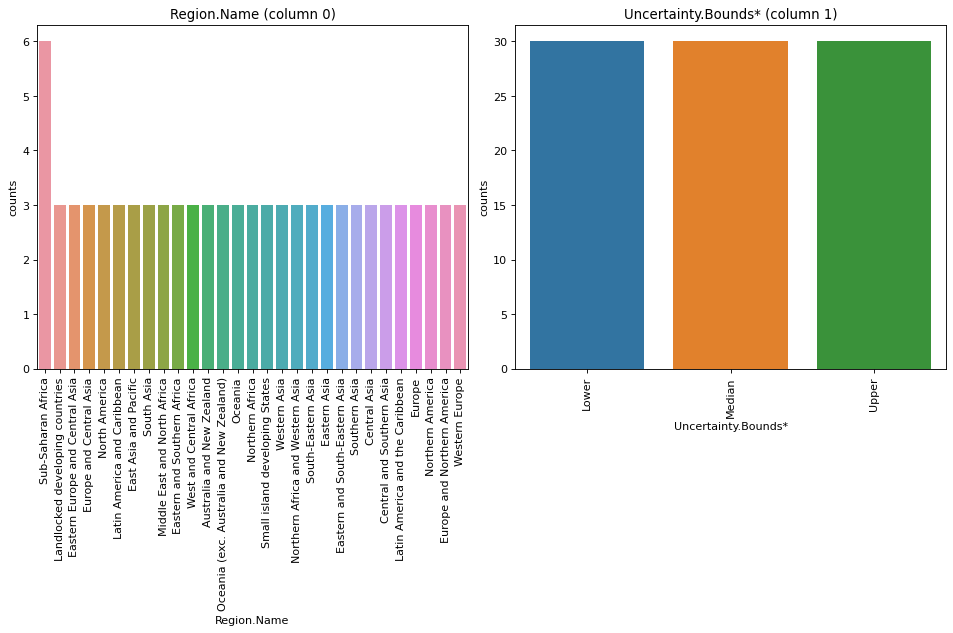

In [141]:
# Modify the function to suit your needs
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        # Your specific modification for bar graphs
        sns.barplot(x=columnDf.value_counts().index, y=columnDf.value_counts().values)
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
plotPerColumnDistribution(Data2, nGraphShown=4, nGraphPerRow=2)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6252\4004351188.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




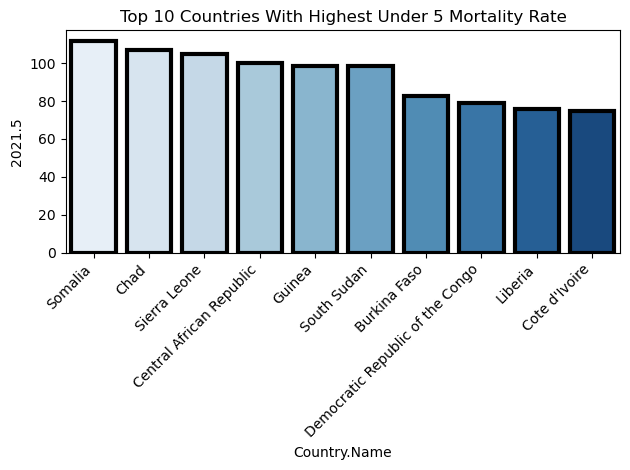

In [142]:
q = Data3.nlargest(10, '2021.5') 
sns.barplot(x='Country.Name', y='2021.5', data=q, ci=None, palette='Blues', edgecolor='black', lw=3)
plt.title('Top 10 Countries With Highest Under 5 Mortality Rate')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent clipping of labels
plt.tight_layout()
# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6252\3416430434.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




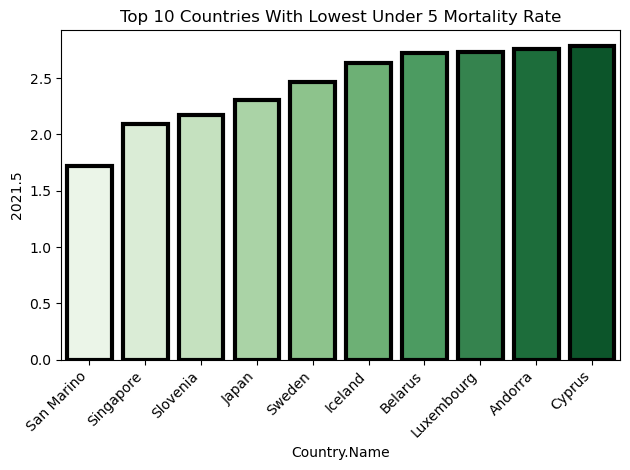

In [175]:
q_lowest = Data3.nsmallest(10, '2021.5')

# Create a bar plot for the 10 countries with the lowest child mortality rates
sns.barplot(x='Country.Name', y='2021.5', data=q_lowest, ci=None, palette='Greens', edgecolor='black', lw=3)
plt.title('Top 10 Countries With Lowest Under 5 Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [143]:
w = Data3.groupby(["Country.Name"])["2021.5"].mean()
mortality = w.nlargest(20).index
# Filter the DataFrame to include only the selected countries
filtered_data =  Data3[Data3["Country.Name"].isin(mortality)]
data = dict(
    type='choropleth',
    locations=filtered_data["Country.Name"],
    locationmode='country names',
    colorscale='Viridis',
    text=filtered_data["Country.Name"],
    z=filtered_data["2021.5"],
    colorbar={'title': '2021.5 Under 5 Mortality Rate', 'len': 350, 'lenmode': 'pixels'}
)

layout = dict(
    geo={'scope': 'world'},
    title="Top 10 Countries With the heghest Under 5 Mortality Rates (2021.5)"
)

choropleth_map = go.Figure(data=[data], layout=layout)
choropleth_map.show()


In [144]:
import plotly.graph_objs as go
import pandas as pd


w = Data3.groupby(["Country.Name"])["2021.5"].mean()

data = dict(
    type='choropleth',
    locations=w.index,
    locationmode='country names',
    colorscale='Viridis',  # Change this line to use the 'Viridis' color scale
    text=w.index,
    z=w,
    colorbar={'title': '2021 Under 5 Mortality Rate', 'len': 350, 'lenmode': 'pixels'}
)

layout = dict(
    geo={'scope': 'world'},
    title="Under 5 Mortality Rate of 2021.5 (Death Per 1000 Births)"
)

choropleth_map = go.Figure(data=[data], layout=layout)
choropleth_map.show()


In [145]:
import plotly.express as px

# Assuming 'data' is your DataFrame
# Extract years from the columns
years = Data3.columns[5:-1]
years = [str(year) for year in years]

# Create animated bar chart
fig_bar = px.bar(Data3, x='2021.5', y='Country.Name', orientation='h',
                 animation_frame='2021.5',  # Replace 'Year' with the correct column name
                 color='2021.5',
                 title='Under-five Mortality Rates Over the Years',
                 labels={'2021.5': 'Mortality Rate (Deaths per 1000 live births)'})


# Update layout for animation controls
fig_bar.update_layout(updatemenus=[{
    'type': 'buttons',
    'showactive': False,
    'buttons': [
        {'label': 'Play',
         'method': 'animate',
         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
        {'label': 'Pause',
         'method': 'animate',
         'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
        }],
}])

# Add slider for selecting the year
fig_bar.update_layout(sliders=[{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right',
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'steps': [{
        'args': [
            [year],
            {
                'frame': {'duration': 300, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
            },
        ],
        'label': str(year),
        'method': 'animate',
    } for year in years],
}])

# Show the plot
fig_bar.show()


In [157]:
#Dividing data into independent and dependent varible
x=np.array(Data['Year']).reshape(-1,1)
y=np.array(Data['Lower']).reshape(-1,1)

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Extracting features (X) and target variable (y) for Data1
X_data =Data[['Year']].astype(float)
y_data = Data['Lower'].astype(float)

# Split the data into training and testing sets for Data1
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Regression Models for Data1
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test_data, y_pred)
    r2 = r2_score(y_test_data, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')


Linear Regression - Mean Squared Error: 11.68274949644685, R-squared: 0.9532390524105752
Decision Tree - Mean Squared Error: 182.55242148714288, R-squared: 0.2693223272416234
Random Forest - Mean Squared Error: 74.29776152767101, R-squared: 0.7026184860110498


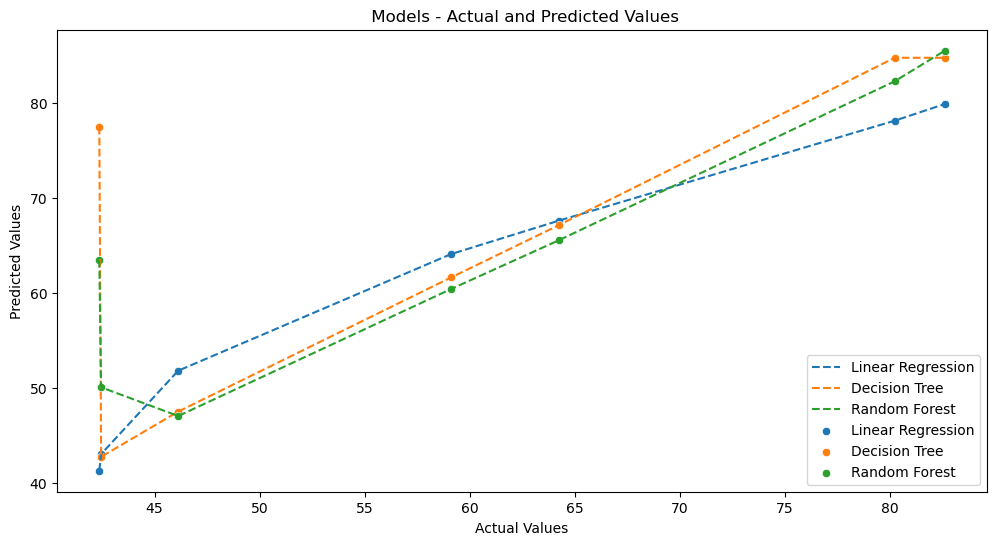

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for all three models
plt.figure(figsize=(12, 6))

# Linear Regression
sns.lineplot(x=y_test_data, y=models['Linear Regression'].predict(X_test_data), label='Linear Regression', linestyle='dashed')
# Decision Tree
sns.lineplot(x=y_test_data, y=models['Decision Tree'].predict(X_test_data), label='Decision Tree', linestyle='dashed')
# Random Forest
sns.lineplot(x=y_test_data, y=models['Random Forest'].predict(X_test_data), label='Random Forest', linestyle='dashed')

# Scatter plot points for all three models
sns.scatterplot(x=y_test_data, y=models['Linear Regression'].predict(X_test_data), label='Linear Regression')
sns.scatterplot(x=y_test_data, y=models['Decision Tree'].predict(X_test_data), label='Decision Tree')
sns.scatterplot(x=y_test_data, y=models['Random Forest'].predict(X_test_data), label='Random Forest')

plt.title(' Models - Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [160]:
correlation_matrix = Data.corr()
# Display the correlation matrix
print(correlation_matrix)


            Year     Upper    Median     Lower
Year    1.000000 -0.920039 -0.919254 -0.915831
Upper  -0.920039  1.000000  0.999922  0.998953
Median -0.919254  0.999922  1.000000  0.999444
Lower  -0.915831  0.998953  0.999444  1.000000


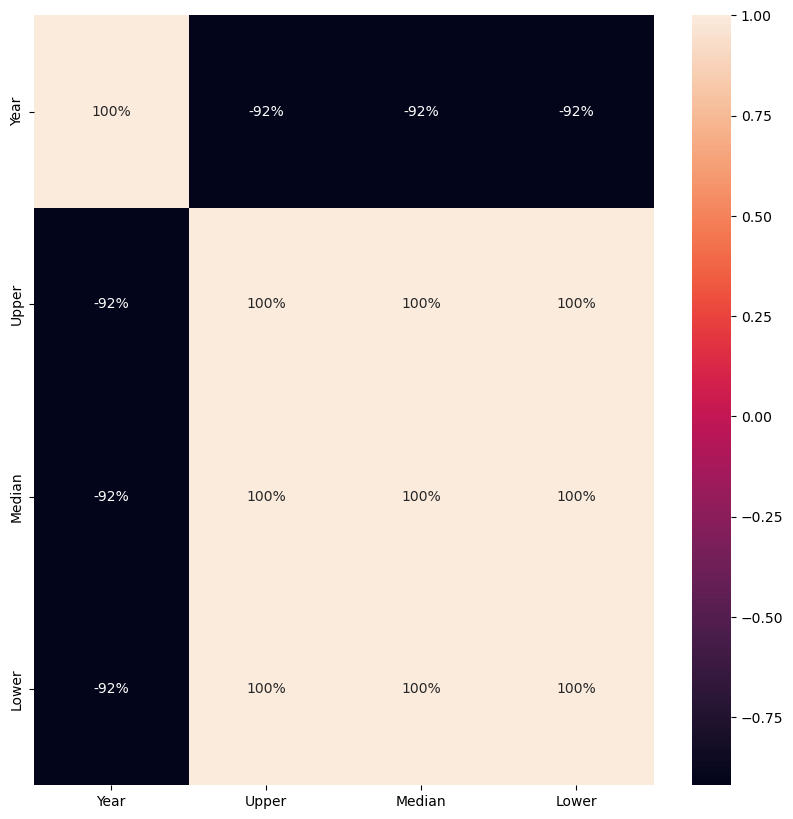

In [161]:
#Visualize the data correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True,fmt=".0%");

In [162]:
# Make predictions on the test set
y_pred_linear_regression = models['Linear Regression'].predict(X_test_data)

# Create a DataFrame to display Actual and Predicted Values
result_df_linear_regression = pd.DataFrame({'Actual': y_test_data, 'Predicted': y_pred_linear_regression})

# Print or show the Actual and Predicted Values
print("Actual and Predicted Values for Linear Regression:")
print(result_df_linear_regression)


Actual and Predicted Values for Linear Regression:
     Actual  Predicted
29  42.4574  43.034927
15  64.2363  67.617319
24  46.1260  51.814352
17  59.1185  64.105548
8   82.6101  79.908515
9   80.2255  78.152630
30  42.3704  41.279041


In [164]:
# Use the Linear Regression model
linear_reg = LinearRegression()

# TO fit the model on our training data
linear_reg.fit(X_train_data, y_train_data)

# Predict for the year 2030.5
prediction_2030_5 = linear_reg.predict([[2030.5]])

# Print the predicted value for 2030.5
print(f'Prediction for 2030.5: {prediction_2030_5[0]}')


Prediction for 2030.5: 23.72018999726697


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [165]:
#dumping a data
from joblib import dump
dump(model,"Modeling Tomorrow.joblib")

['Modeling Tomorrow.joblib']

In [166]:
import pickle
pickle.dump(model,open('model.pkl','wb'))